## PROBLEM ON : ADVANCE REGRESSION
### HOUSE PRICE PREDICTION
Build model the price of houses with the available independent variables

#### PRELIMINARY : EDA

#### IGNORE WARNING AND IMPORT LIBRRARIES

In [388]:
#import required libraries
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler

##### READING THE DATA CSV

In [389]:
# reading the dataset
data = pd.read_csv("train.csv", encoding = 'utf-8')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


###### SANITY FUNCTIONS AND INVESTIGATION ON DATA

In [390]:
def number_rows_columns(data):
    rows, columns = data.shape

    print(f'The dataset has {rows} rows and {columns} columns')
    print("\n")
    

In [391]:
number_rows_columns(data)

The dataset has 1460 rows and 81 columns




In [392]:
def check_duplicates(data):
    row, column = data[data.duplicated()].shape
    print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')
    

In [393]:
check_duplicates(data)

There are no duplicates in the dataset.


In [394]:
def category_numerical(data):
    # number of numerical and categorical features
    num, obj = 0, 0
    for feature in data:
        if data[feature].dtype == 'O':
            obj += 1
        else:
            num += 1
    print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
    print(f'The dataset has {num} numerical features and {obj} categorical features')
    print("\n")

In [395]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 43 categorical features




In [396]:
def percentage_missing(data):
    # Percentage of missing values
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")

In [397]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### NUMBER OF UNIQUE CATEGORICAL FEATURES

In [398]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' : 
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 0 categorical features that has one unique value.
There are 43 categorical features that has more than one unique value.


##### NUMBER OF UNIQUE NUMERICAL FEATURES

In [399]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 0 numerical features that has one unique value including Nan
There are 38 numerical features that has more than one unique value


In [400]:
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'Alley' has 93.77% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'PoolQC' has 99.52% missing values
The feature 'Fence' has 80.75% missing values
The feature 'MiscFeature' has 96.3% missing values




##### DROP FEATURES WITH MORE THAN 80% MISSING VALUES

In [401]:
##removal of data with more than 80% missing values 
data=data[data.columns[data.isnull().mean() < 0.8]]

In [402]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageYrBlt' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values


The dataset has 1460 rows and 77 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 38 numerical features and 39 categorical features




In [403]:
## droping 'Id'
data = data.drop(['Id'],axis='columns')

###### DATA  TRANSFORMATION OF YEAR TO AGE 

In [404]:
data['YearBuilt_Old'] = data.YearBuilt.max()-data.YearBuilt
data['YearRemodAdd_Old'] = data.YearRemodAdd.max()-data.YearRemodAdd
data['GarageYrBlt_Old'] = data.GarageYrBlt.max()-data.GarageYrBlt
data['YrSold_Old'] = data.YrSold.max()-data.YrSold
data[['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','YearBuilt_Old','YearRemodAdd_Old',
             'GarageYrBlt_Old','YrSold_Old']].sample(10)

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1395,2005,2006,2005.0,2007,5,4,5.0,3
989,2006,2006,2006.0,2006,4,4,4.0,4
707,2006,2006,2006.0,2009,4,4,4.0,1
185,1892,1993,1993.0,2006,118,17,17.0,4
345,1939,1950,1939.0,2006,71,60,71.0,4
1135,1926,1950,1926.0,2007,84,60,84.0,3
89,1994,1995,NaN,2007,16,15,NaN,3
1340,1971,1971,1974.0,2007,39,39,36.0,3
62,2006,2006,2006.0,2007,4,4,4.0,3
1032,1993,1993,1993.0,2006,17,17,17.0,4


In [405]:
## droping 'YearBuilt','YearRemodAdd','GarageYrBlt' as these are redundant and derived columns have more significant than year alone but 
## Yr_Sold was not dropped considering if other factors relate them
data = data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

###### From data dictionary we see 'OverallQual' and 'OverallCond' ,'MoSold' has been showed as numeric but it is categorical with specific string values hence mapping them


In [406]:
data.OverallQual.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)
data.OverallCond.replace({10:"Very_Excellent", 9:"Excellent", 8:"Very_Good", 7:"Good",6:"Above_Average",5:"Average",4:"Below_Average",3:"Fair",2:"Poor",1:"Very_Poor"},inplace = True)
data.MoSold.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

In [407]:
number_rows_columns(data)

The dataset has 1460 rows and 76 columns




##### MISSING VALUE IMPUTATION 

In [408]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrType' has 0.55% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'BsmtQual' has 2.53% missing values
The feature 'BsmtCond' has 2.53% missing values
The feature 'BsmtExposure' has 2.6% missing values
The feature 'BsmtFinType1' has 2.53% missing values
The feature 'BsmtFinType2' has 2.6% missing values
The feature 'Electrical' has 0.07% missing values
The feature 'FireplaceQu' has 47.26% missing values
The feature 'GarageType' has 5.55% missing values
The feature 'GarageFinish' has 5.55% missing values
The feature 'GarageQual' has 5.55% missing values
The feature 'GarageCond' has 5.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 34 numerical features and 42 categorical features




In [409]:
print('\nLESS THAN 6% MISSING VALUES IMPUTATION')
less_th6_lst=[]
for feature in data:
    if data[feature].dtype == 'O'and np.round((data[feature].isnull().mean()*100),2)<=50.0 and np.round((data[feature].isnull().mean()*100),2)>0.0:
        less_th6_lst.append(str(feature))

for feature in less_th6_lst:
    data[""+feature+""].fillna(data[""+feature+""].mode()[0],inplace=True)
    print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")


LESS THAN 6% MISSING VALUES IMPUTATION
The feature 'MasVnrType' has 0.0% missing values
The feature 'BsmtQual' has 0.0% missing values
The feature 'BsmtCond' has 0.0% missing values
The feature 'BsmtExposure' has 0.0% missing values
The feature 'BsmtFinType1' has 0.0% missing values
The feature 'BsmtFinType2' has 0.0% missing values
The feature 'Electrical' has 0.0% missing values
The feature 'FireplaceQu' has 0.0% missing values
The feature 'GarageType' has 0.0% missing values
The feature 'GarageFinish' has 0.0% missing values
The feature 'GarageQual' has 0.0% missing values
The feature 'GarageCond' has 0.0% missing values


In [410]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
The feature 'LotFrontage' has 17.74% missing values
The feature 'MasVnrArea' has 0.55% missing values
The feature 'GarageYrBlt_Old' has 5.55% missing values


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 34 numerical features and 42 categorical features




###### ANALYSIS ON 'LotFrontage'

In [411]:
data.LotFrontage.describe([0.25,0.50,0.75,0.99])

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64

##### MEAN AND MEDIAN IS CLOSE HENCE WE WILL IMPUTE MEDIAN VALUE 

In [412]:
print(data.columns.values)
number_rows_columns(data)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'LotShape'
 'LandContour' 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood'
 'Condition1' 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual'
 'OverallCond' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual'
 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2'
 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea'
 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath' 'BedroomAbvGr'
 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional' 'Fireplaces'
 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageCars' 'GarageArea'
 'GarageQual' 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF'
 'EnclosedPorch' '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold'
 'SaleType' 'SaleCondition' 'SalePrice' 'YearBuilt_Old' 'YearRemodAdd_Old'
 'GarageYrBlt_Old' 'YrSold_O

In [413]:
 data.LotFrontage.fillna(data.LotFrontage.median(),inplace=True)

###### ANALYSIS ON 'MasVnrArea'

In [414]:
data.MasVnrArea.describe([0.25,0.50,0.75,0.99])

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [415]:
print(data['MasVnrArea'].value_counts())

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64


#####  IMPUTE MODE  VALUE 

In [416]:
 data.MasVnrArea.fillna(data.MasVnrArea.mode()[0],inplace=True)

###### ANALYSIS ON 'GarageYrBlt_Old'

In [417]:
 ### imputing -1 in missing places of GarageYrBlt_Old as missing values indicate not having a garage built 
data.GarageYrBlt_Old.fillna(-1,inplace=True)

In [418]:
percentage_missing(data)
number_rows_columns(data)
category_numerical(data)


PERCENTAGE MISSING VALUES:
There is no missing values in the dataset


The dataset has 1460 rows and 76 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 34 numerical features and 42 categorical features




In [419]:
# number of numerical and categorical features
num, obj = 0, 0
numerical_feature=[]
categorical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

print(f'{categorical_feature} are categorical features')
print(f'{numerical_feature} are numerical features')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'] are categorical features
['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'M

In [420]:
category_numerical(data)

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 34 numerical features and 42 categorical features




### UNIVARIATE ANALYSIS

###### ANALYSIS ON TARGET VARIABLE 

Text(0.5, 1.0, 'DISTRIBUTION -TARGET ')

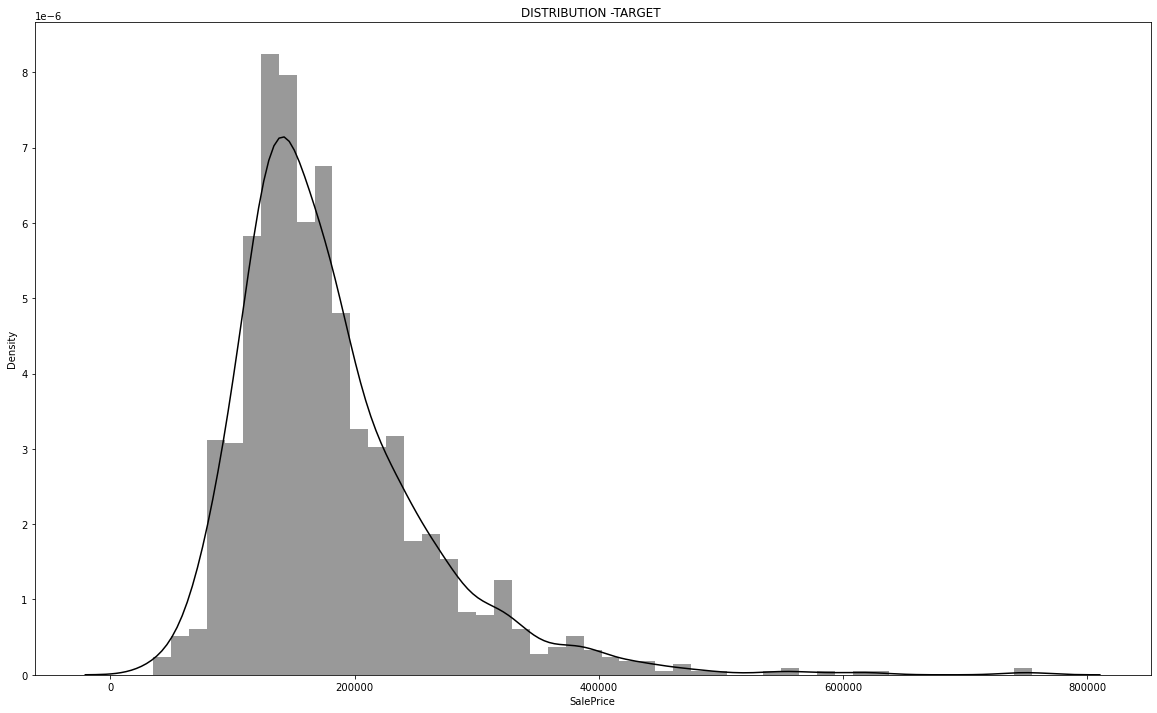

In [421]:
plt.figure(figsize=(20,12))
ax = sns.distplot(data['SalePrice'], color='black')
ax.set_title('DISTRIBUTION -TARGET ')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

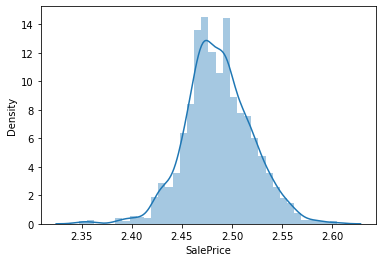

In [422]:
data['SalePrice']=np.log(data["SalePrice"])
sns.distplot(np.log(data["SalePrice"]))

In [423]:
data.SalePrice.describe([0.25,0.50,0.75,0.9,0.99])

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
90%        12.535376
99%        13.000323
max        13.534473
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

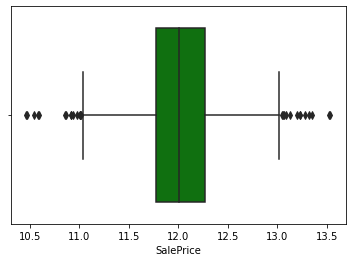

In [424]:
sns.boxplot(x=data['SalePrice'], color='green')

There is skew is in target variable towards right.

We don't transform target variable with IQR or any outlier technique but we can take log of the value if needed. But here we shall not take any log 

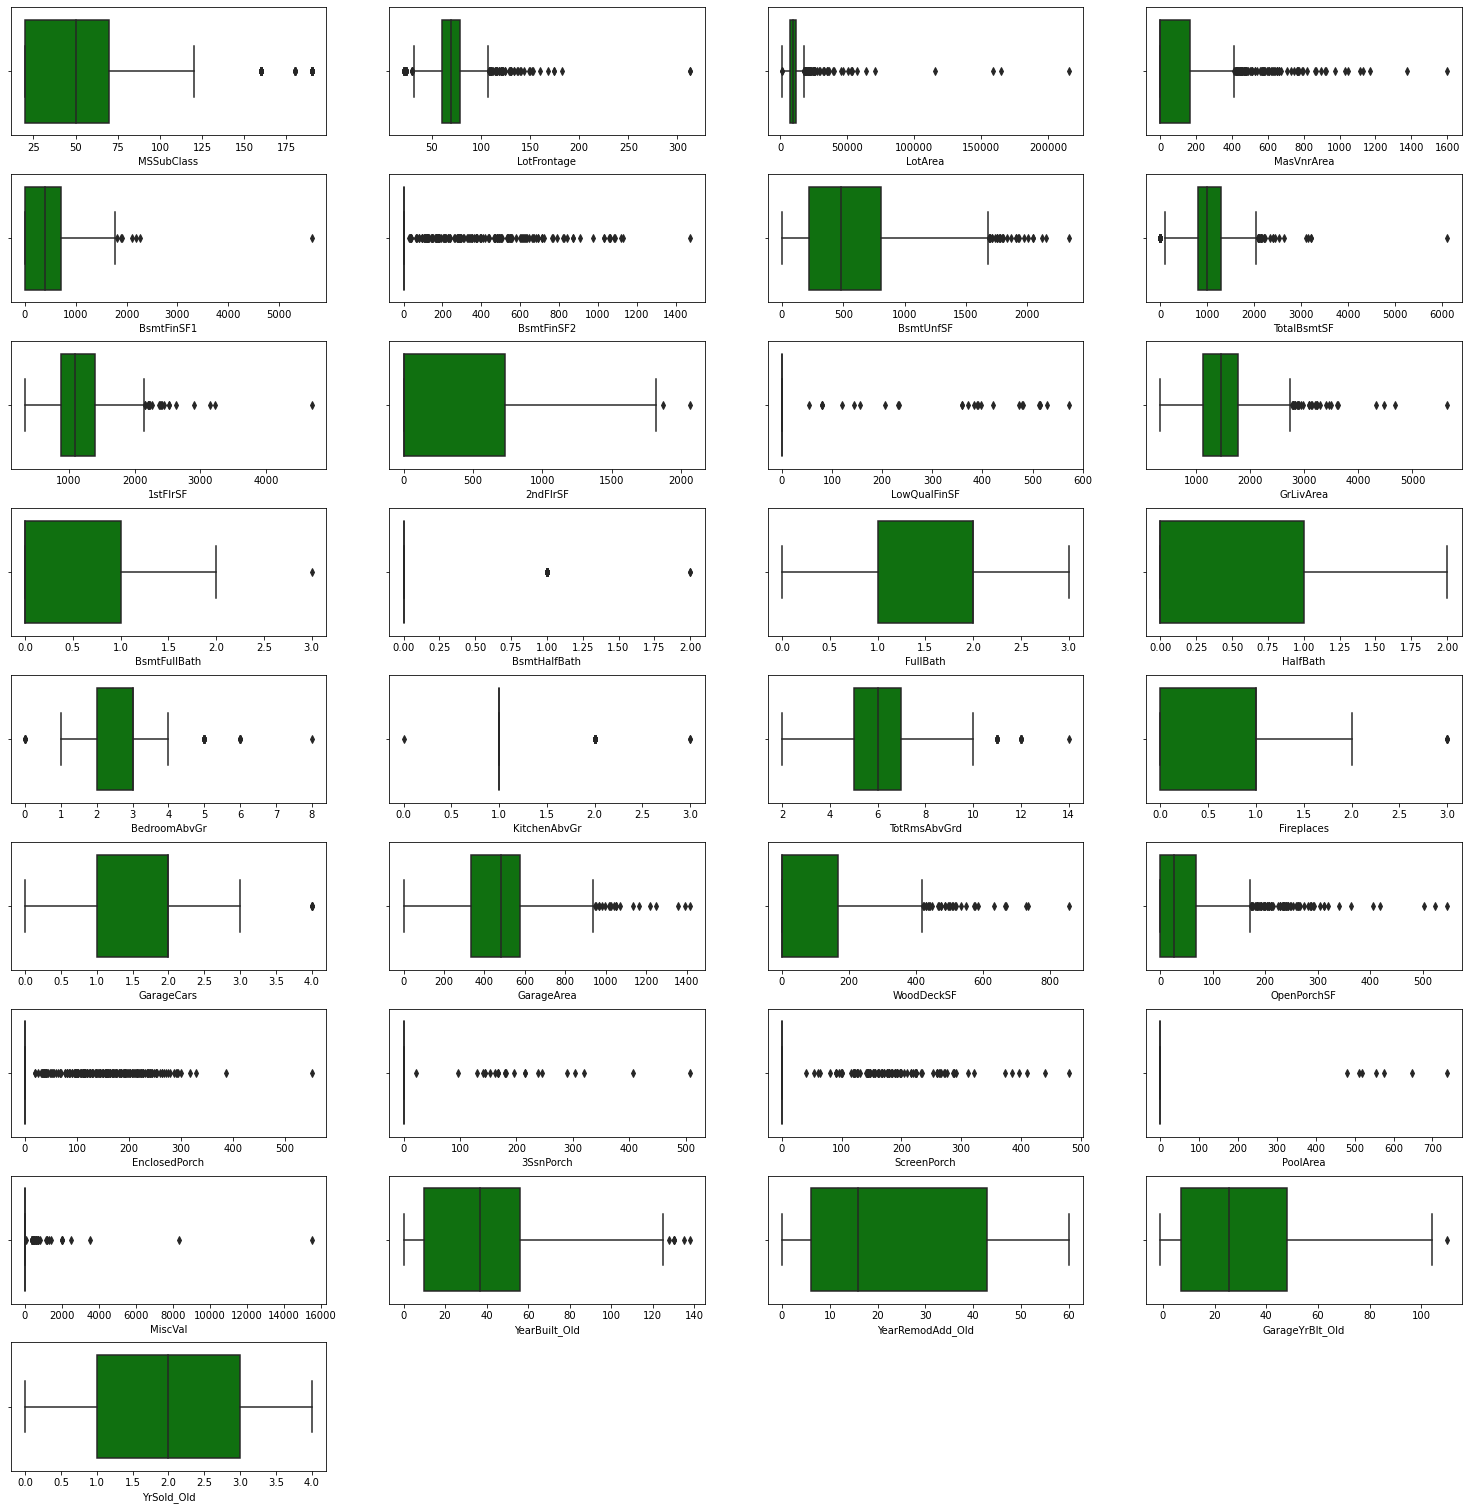

In [425]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])






sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1


##### CONCLUSION OF UNIVARIATE 
- Number of years ago Garage built in the data is around 15-45yr
- Number of years ago House built in the data is around 15-58yr
- Most people have garage cars from 1-2 

##### We can see clear outlier in many columns hence using IQR technique to remove outliers

In [426]:
outlier_feature_moretha2=numerical_feature
for feature in outlier_feature_moretha2:
    if data[feature].dtype!='O' and len(data[feature].unique())>2:
        lower_quartile = data[feature].quantile(0.25)
        upper_quartile = data[feature].quantile(0.75)
        IQR = upper_quartile - lower_quartile
        lower_fence = lower_quartile - (1.5*IQR)
        upper_fence = upper_quartile + (1.5*IQR)
        
        data[feature] = np.where(data[feature]>upper_fence, 
                                upper_fence,   
                                data[feature])
        
        data[feature] = np.where(data[feature]<lower_fence,
                               lower_fence,
                               data[feature])

In [427]:
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
            
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 9 numerical features that has one unique value including Nan
There are 25 numerical features that has more than one unique value


In [428]:
data=data[data.columns[data.nunique()!=1]]

In [429]:
number_rows_columns(data)
category_numerical(data)

The dataset has 1460 rows and 67 columns


NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
The dataset has 25 numerical features and 42 categorical features




In [430]:
# number of numerical and categorical features
num, obj = 0, 0
numerical_feature=[]
categorical_feature=[]
for feature in data:
    if data[feature].dtype == 'O':
        categorical_feature.append(feature)
        obj += 1
    else:
        num += 1
        numerical_feature.append(feature)

print(f'{categorical_feature} are categorical features')
print("\n")
print(f'{numerical_feature} are numerical features')

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'SaleType', 'SaleCondition'] are categorical features


['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'YearBuilt_Old', 'YearRemodAdd_Old', 'GarageYrBlt_Old', 'YrSold_Old'] are numerical features


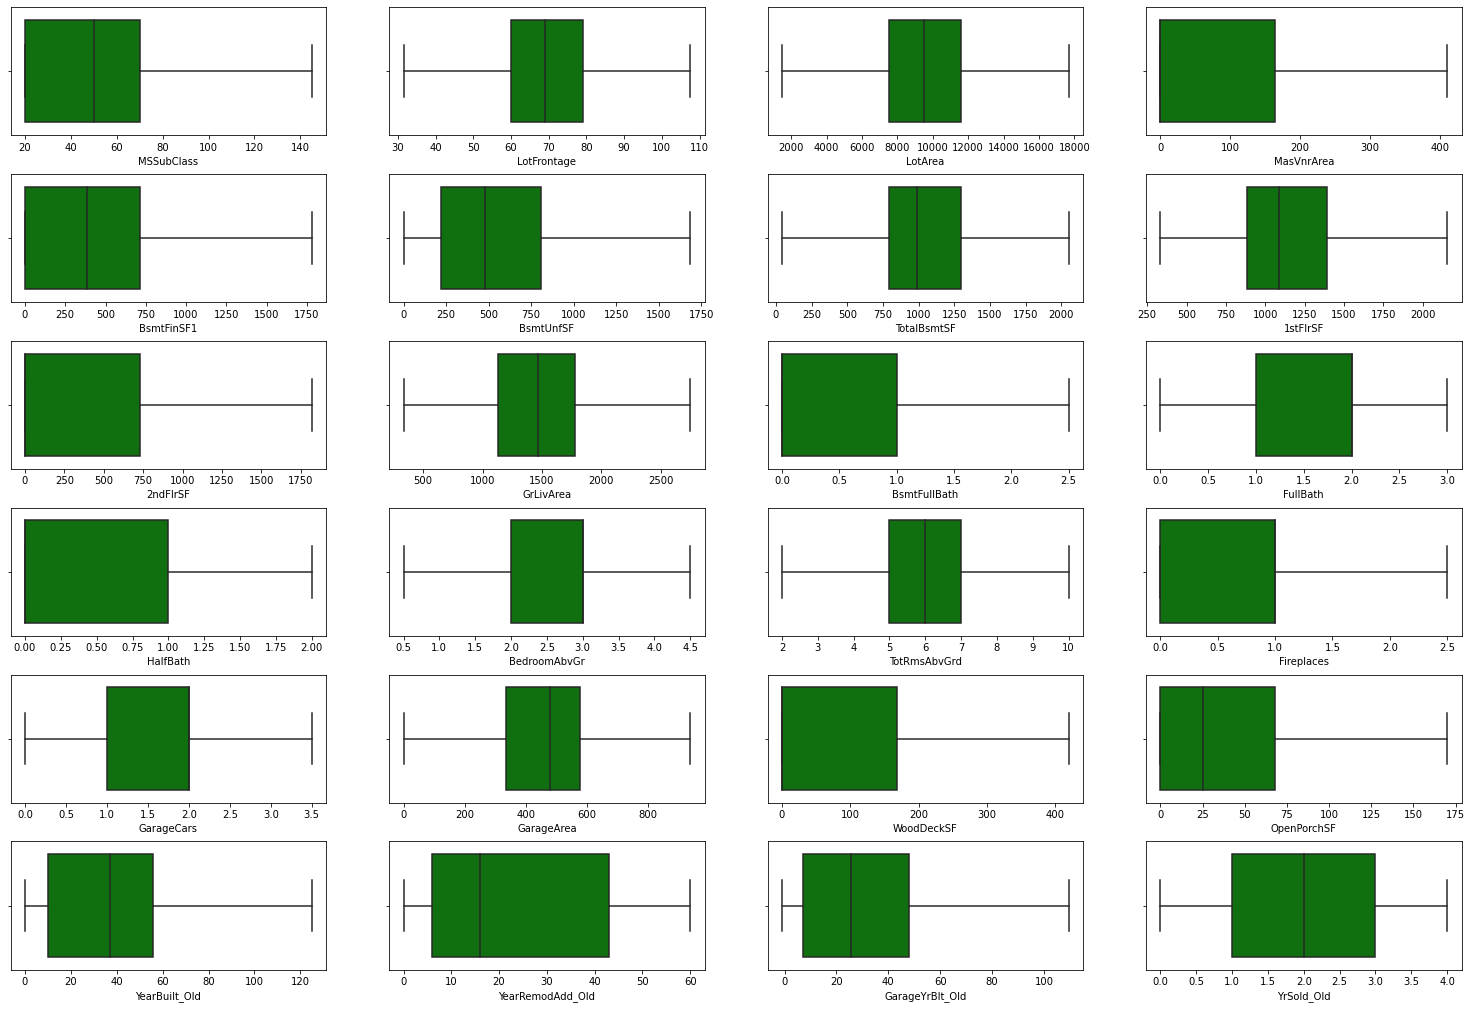

In [431]:
#Creating subplots

fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])








sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24]
cnt = 0
for feature in numerical_feature:
    if data[feature].dtype=='O' or feature=='SalePrice':
        continue
    else:

        sns.boxplot(x=data[feature], ax=sec[cnt], color='green')
        cnt+=1

##### We can see the outliers are not there hence suitable for applying regression techniques 

### BIVARIATE ANALYSIS 

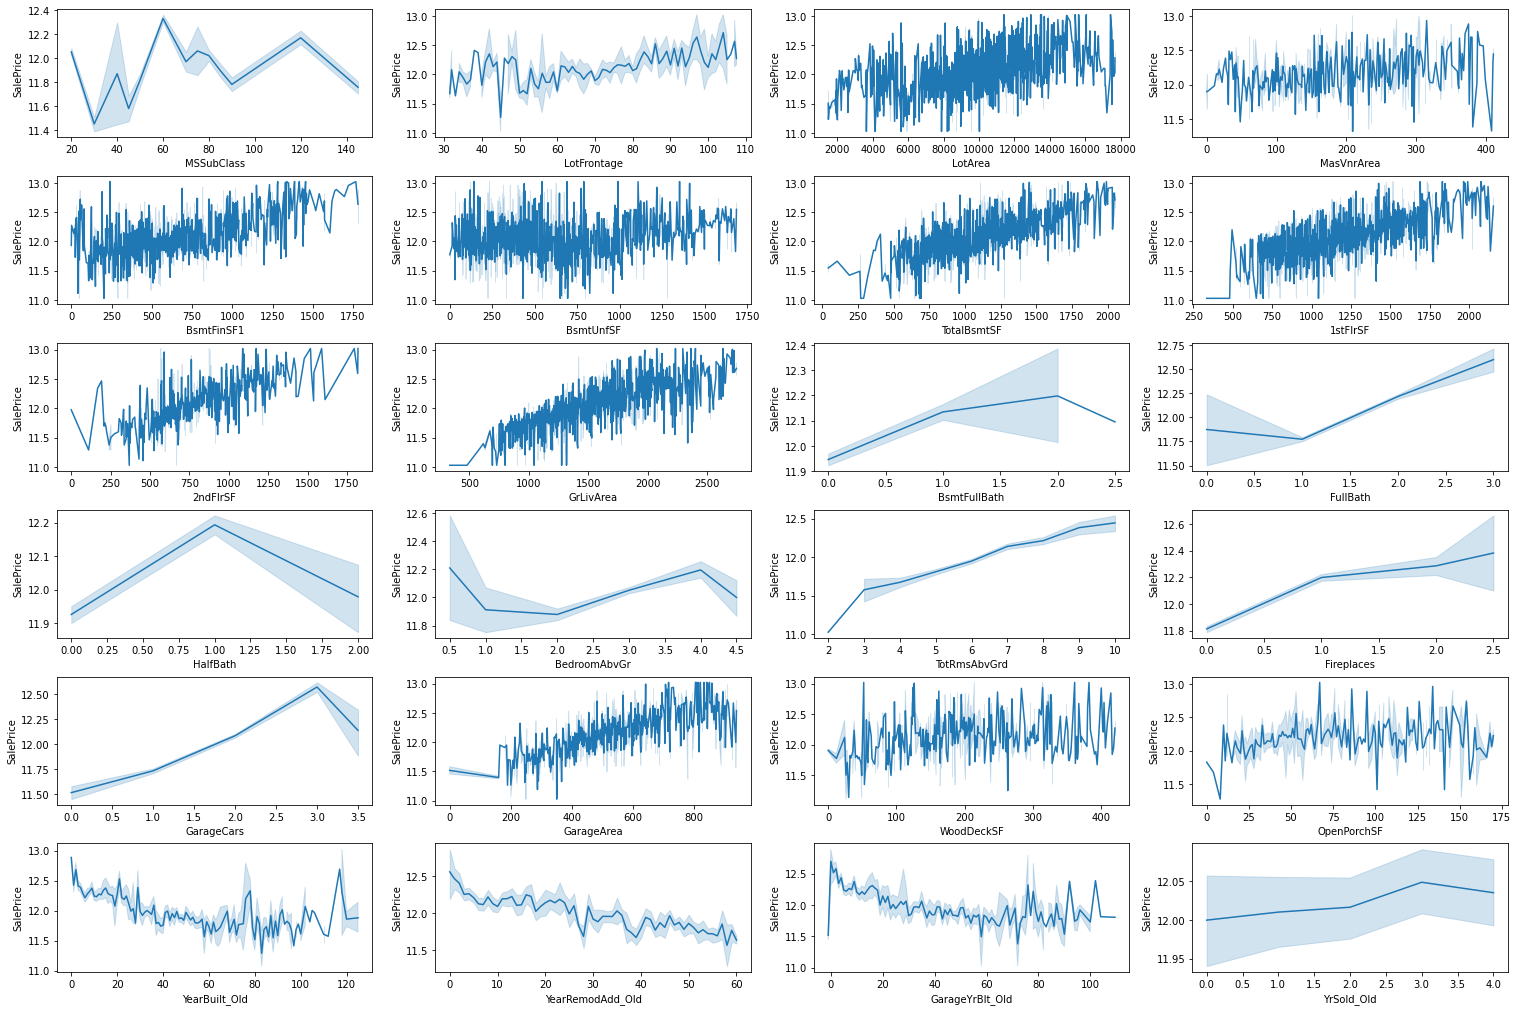

In [433]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,30))
spec = fig.add_gridspec(10,4)


spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])





sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24]
cnt = 0
for feature in numerical_feature:
    if feature!='SalePrice':
        sns.lineplot(data=data,x=data[feature],y='SalePrice', 
                 ax=sec[cnt],
                 palette=['#AECB46', "#FF4C33"])
        cnt=cnt+1

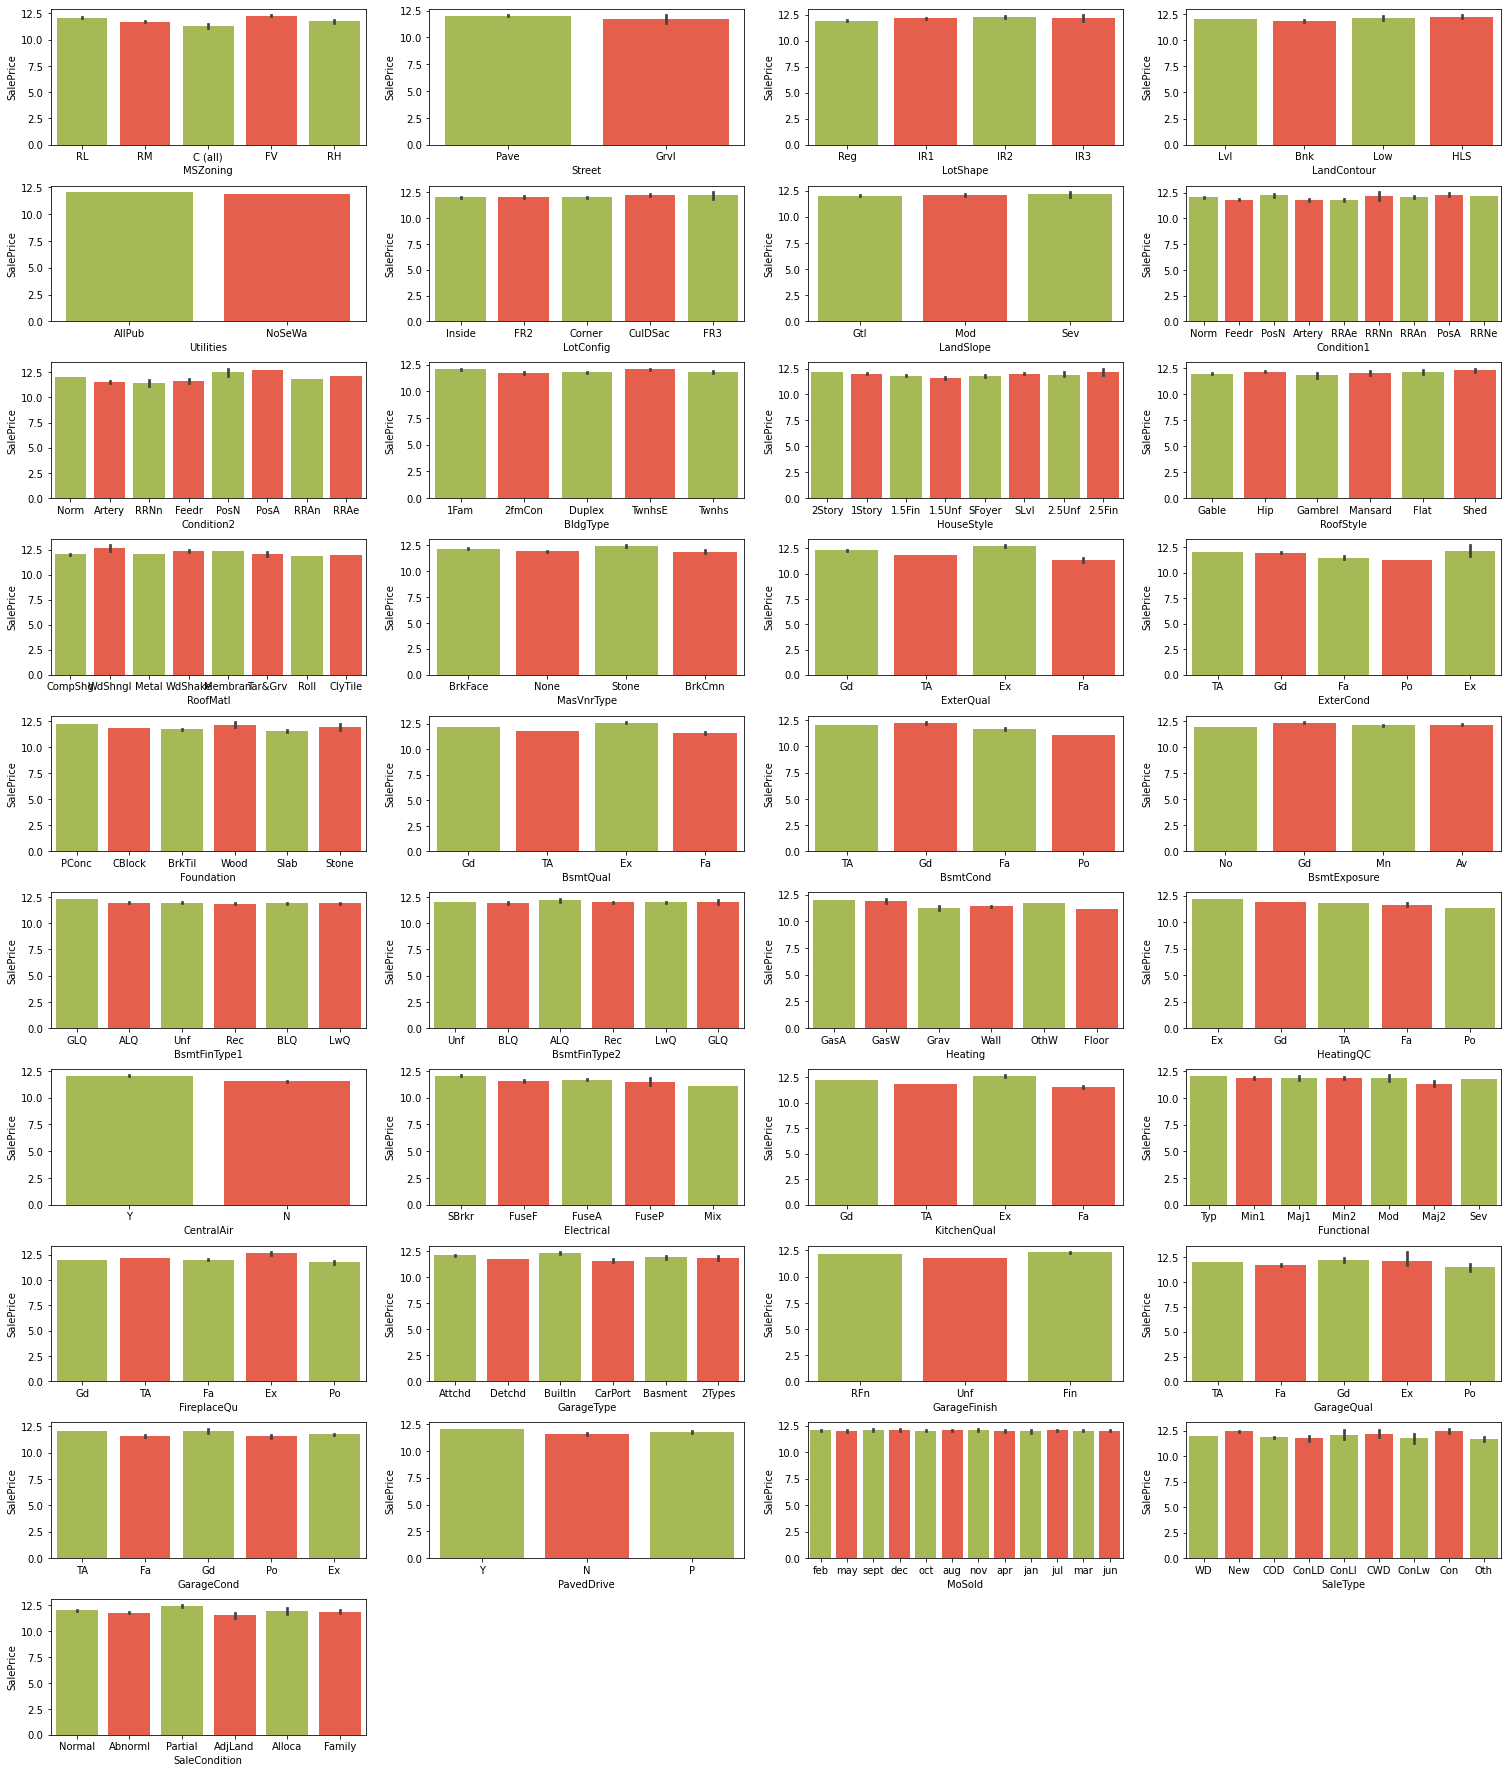

In [439]:
#Creating subplots
import seaborn as sns
fig = plt.figure(figsize=(26,35))
spec = fig.add_gridspec(11,4)
sec=[]
cnt=0
spec.update(wspace=0.2, hspace=0.3)


sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])
sec_04 = fig.add_subplot(spec[0,3])
sec_05 = fig.add_subplot(spec[1,0])
sec_06 = fig.add_subplot(spec[1,1])
sec_07 = fig.add_subplot(spec[1,2])
sec_08 = fig.add_subplot(spec[1,3])
sec_09 = fig.add_subplot(spec[2,0])
sec_10 = fig.add_subplot(spec[2,1])
sec_11 = fig.add_subplot(spec[2,2])
sec_12 = fig.add_subplot(spec[2,3])
sec_13 = fig.add_subplot(spec[3,0])
sec_14 = fig.add_subplot(spec[3,1])
sec_15 = fig.add_subplot(spec[3,2])
sec_16 = fig.add_subplot(spec[3,3])
sec_17 = fig.add_subplot(spec[4,0])
sec_18 = fig.add_subplot(spec[4,1])
sec_19 = fig.add_subplot(spec[4,2])
sec_20 = fig.add_subplot(spec[4,3])
sec_21 = fig.add_subplot(spec[5,0])
sec_22 = fig.add_subplot(spec[5,1])
sec_23 = fig.add_subplot(spec[5,2])
sec_24 = fig.add_subplot(spec[5,3])
sec_25 = fig.add_subplot(spec[6,0])
sec_26 = fig.add_subplot(spec[6,1])
sec_27 = fig.add_subplot(spec[6,2])
sec_28 = fig.add_subplot(spec[6,3])
sec_29 = fig.add_subplot(spec[7,0])
sec_30 = fig.add_subplot(spec[7,1])
sec_31 = fig.add_subplot(spec[7,2])
sec_32 = fig.add_subplot(spec[7,3])
sec_33 = fig.add_subplot(spec[8,0])
sec_34 = fig.add_subplot(spec[8,1])
sec_35 = fig.add_subplot(spec[8,2])
sec_36 = fig.add_subplot(spec[8,3])
sec_37 = fig.add_subplot(spec[9,0])





## too_many_value is array created for better visualisation as this array has values which gets overlapped if shown in subplot 
too_many_value=['Neighborhood','Exterior1st','Exterior2nd','OverallCond','OverallQual']
sec = [sec_01, sec_02, sec_03, sec_04, sec_05, sec_06, sec_07, sec_08, sec_09, sec_10,sec_11,sec_12,sec_13,sec_14,sec_15,sec_16,sec_17,sec_18,sec_19,sec_20,sec_21,sec_22,sec_23,sec_24,sec_25,sec_26,sec_27,sec_28,sec_29,sec_30,sec_31,sec_32,sec_33,sec_34,sec_35,sec_36,sec_37]
cnt = 0
for feature in categorical_feature:
    if feature not in too_many_value:
        sns.barplot(data =data, 
                x=data[feature],
                 y='SalePrice', 
                 ax=sec[cnt],
                 palette=['#AECB46', "#FF4C33"])
        cnt+=1


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

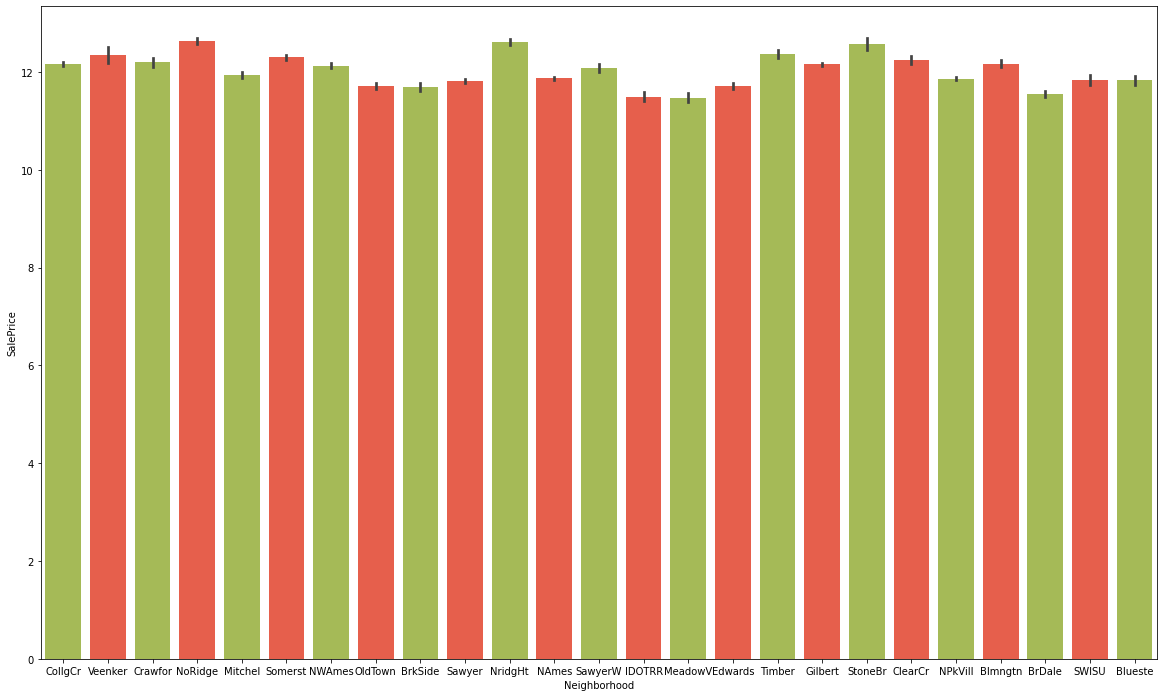

In [435]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Neighborhood'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])

<AxesSubplot:xlabel='Exterior1st', ylabel='SalePrice'>

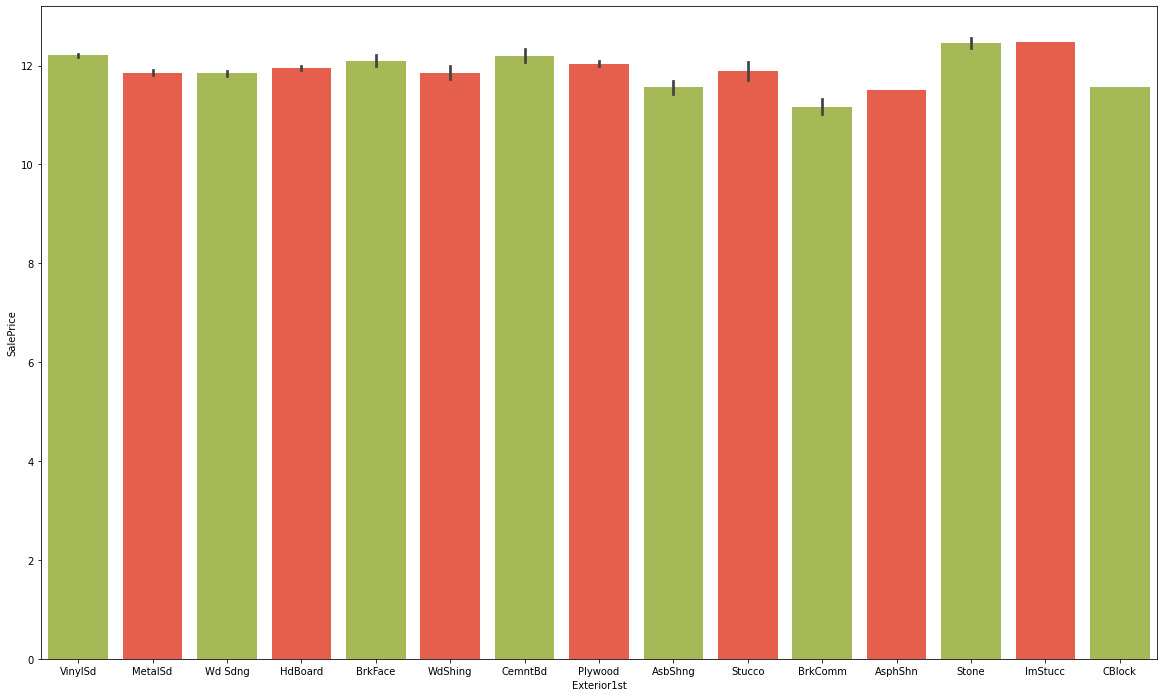

In [436]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Exterior1st'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])


<AxesSubplot:xlabel='Exterior2nd', ylabel='SalePrice'>

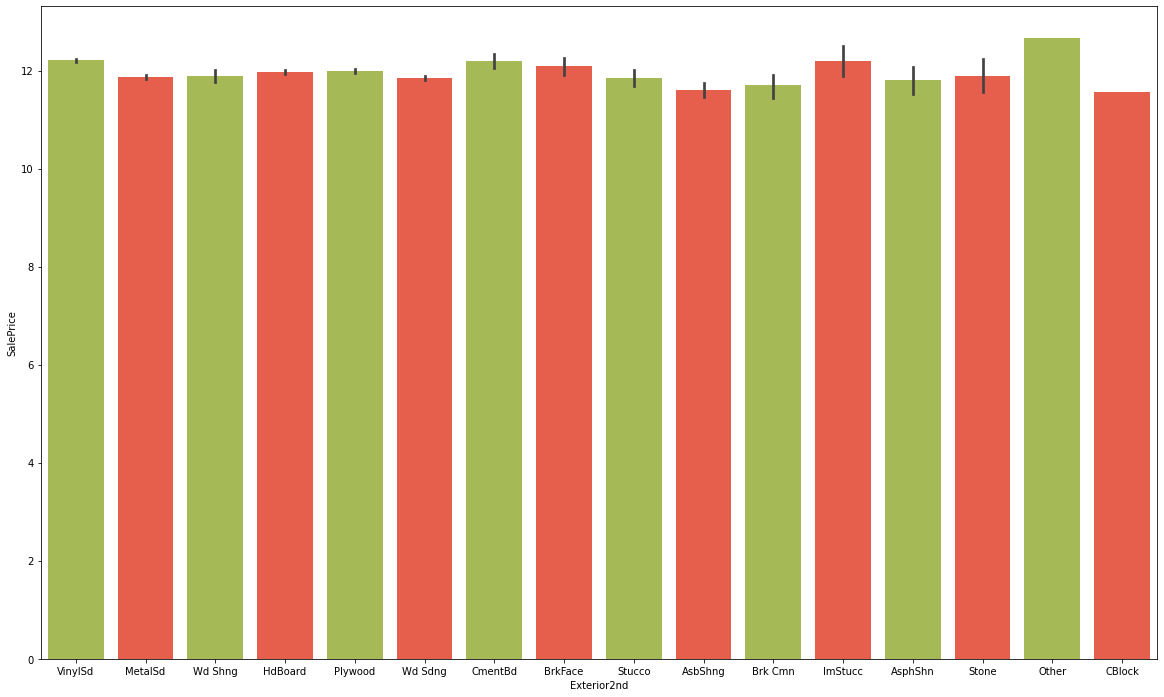

In [437]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['Exterior2nd'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

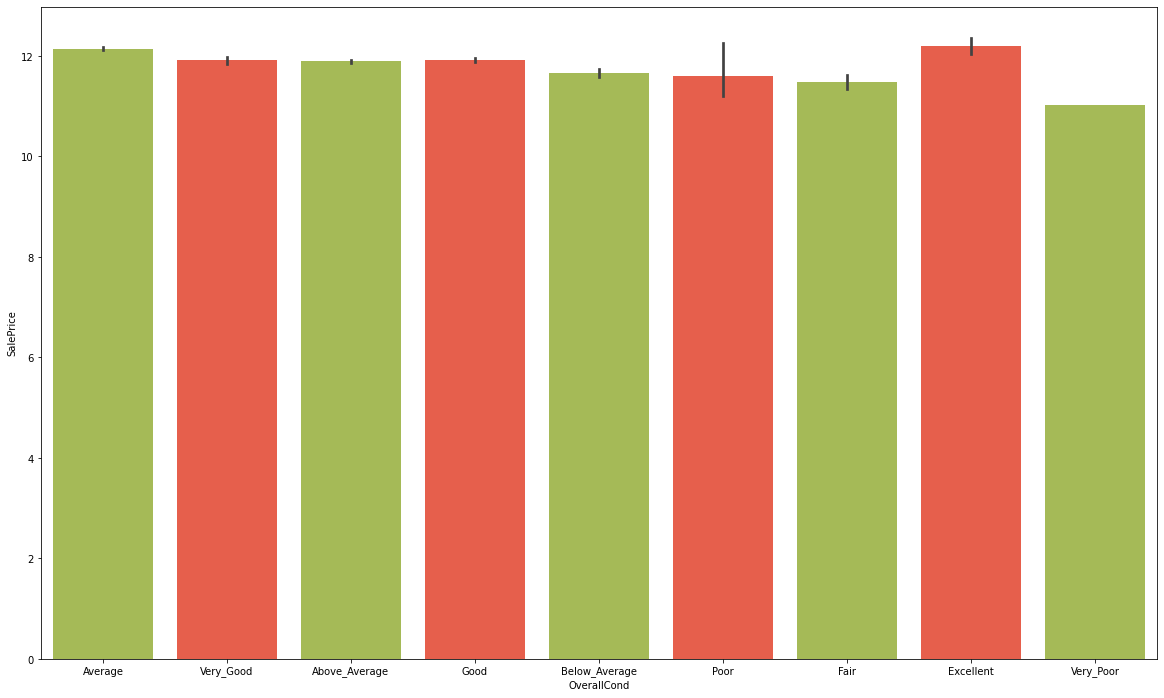

In [438]:
plt.figure(figsize=(20,12))
sns.barplot(data =data, 
                x=data['OverallCond'],
                 y='SalePrice', 
                 
                 palette=['#AECB46', "#FF4C33"])

#### CONCLUSION OF BIVARIATE 
- KitchenQual Excellent has greater price
- MSZoning shows Residential Low Density and Floating Village Residential have higher price than Commerical place
- If house has road access which are Paved then price is higher
- If home is very new "Home was not completed when last assessed" then price is higher found from SaleCondition feature
- If house has Roof of shed it has higher price
- Sale price of houses whose Neighborhood is IDOTRR->Iowa DOT and Rail Road and MeadowV->Meadow Village are very less compared to others

#### MULTIVARIATE ANALYSIS

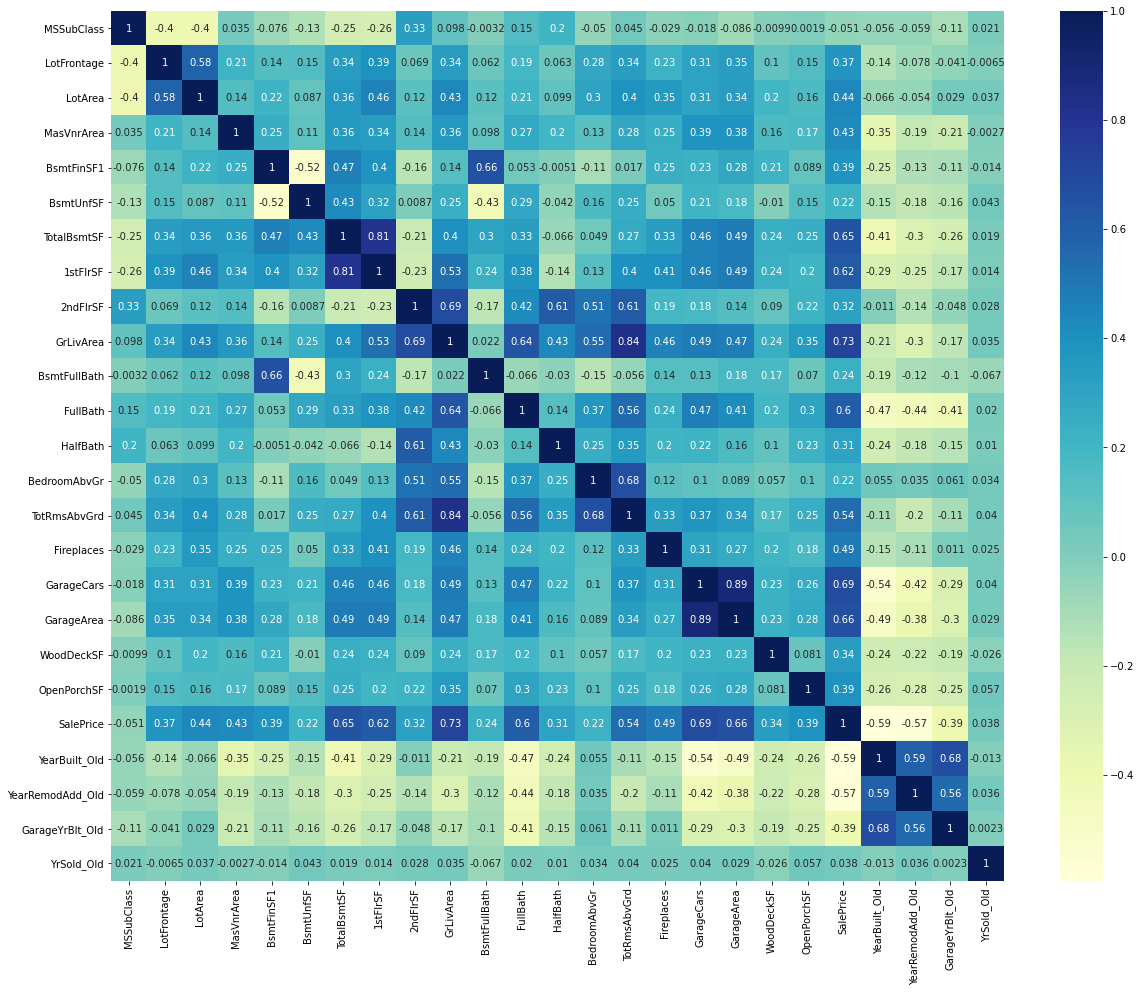

In [444]:
plt.figure(figsize = (20, 16))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

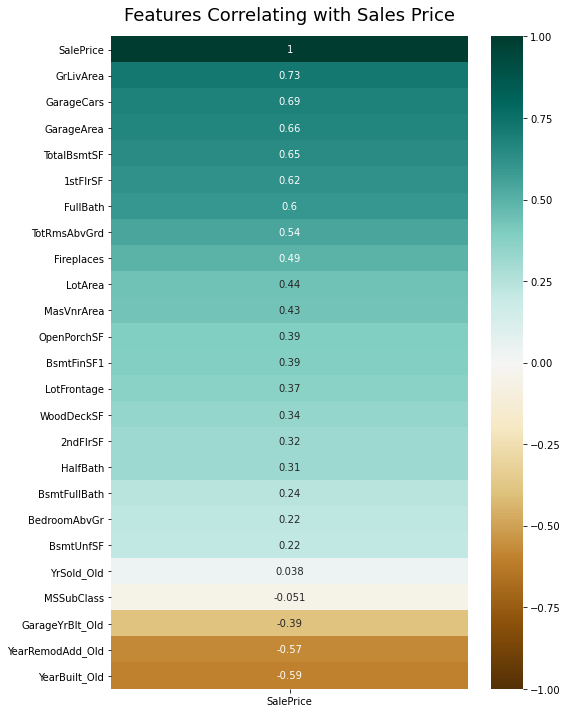

In [446]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(data.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

#### CONCLUSION OF MULTIVARIATE ANALYSIS
- GrLivArea ,GarageCars ,GarageArea and TotalBSMTSF and 1st Flr SF have greater influence on target variable Sale Price

##### DUMMY FEATURE 

In [447]:
# Convert categorical value into Dummy variable
data=pd.get_dummies(data,drop_first=True)
data.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,1.0,2.0,1.0,3.0,8.0,0.0,2.0,548.0,0.0,61.0,12.247694,7.0,7.0,7.0,2.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20.0,80.0,9600.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,0.0,2.0,0.0,3.0,6.0,1.0,2.0,460.0,298.0,0.0,12.109011,34.0,34.0,34.0,3.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60.0,68.0,11250.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,1.0,2.0,1.0,3.0,6.0,1.0,2.0,608.0,0.0,42.0,12.317167,9.0,8.0,9.0,2.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70.0,60.0,9550.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,1.0,1.0,0.0,3.0,7.0,1.0,3.0,642.0,0.0,35.0,11.849398,95.0,40.0,12.0,4.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60.0,84.0,14260.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,1.0,2.0,1.0,4.0,9.0,1.0,3.0,836.0,192.0,84.0,12.429216,10.0,10.0,10.0,2.0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [448]:
data_train, data_test = train_test_split(data, train_size = 0.70, test_size = 0.30, random_state = 42)

In [449]:
##test and train shape check 
rows, columns = data_train.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')
rows, columns = data_test.shape
print(f'The encoded feature dataset has {rows} rows and {columns} columns')

The encoded feature dataset has 1021 rows and 253 columns
The encoded feature dataset has 438 rows and 253 columns


In [504]:

data_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=252)

In [451]:

scaler = StandardScaler()
data_train[numerical_feature] = scaler.fit_transform(data_train[numerical_feature])
data_train.head()
data_test[numerical_feature] = scaler.fit_transform(data_test[numerical_feature])
data_test.head()


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_aug,MoSold_dec,MoSold_feb,MoSold_jan,MoSold_jul,MoSold_jun,MoSold_mar,MoSold_may,MoSold_nov,MoSold_oct,MoSold_sept,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.939015,0.064337,-0.306153,-0.623124,0.511212,-0.376171,0.027630,-0.202389,-0.779535,-0.839780,-0.833311,-0.931395,-0.770007,0.268350,-0.277716,-0.979225,-0.938334,-0.911810,0.994294,-0.766730,-0.163228,0.310660,-0.876356,0.687649,1.364652,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1105,0.135898,1.711573,0.779401,2.172822,1.344284,-0.292686,1.042405,0.979423,1.861821,2.358664,1.097854,0.842305,1.146260,0.268350,1.673720,2.233513,0.358165,1.177780,0.938043,-0.112732,1.710911,-0.766772,-0.484278,-0.556607,-1.635185,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
413,-0.670287,-0.759282,-0.151881,-0.623124,-0.985609,1.083616,-0.100473,-0.311816,-0.779535,-0.922108,-0.833311,-0.931395,-0.770007,-1.044916,-0.928194,0.627144,0.358165,-0.464041,-0.805722,-0.766730,-0.907363,1.561872,1.721158,2.132592,-1.635185,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
522,-0.132830,-1.112261,-1.270776,-0.623124,-0.084807,0.122351,-0.110520,-0.377472,0.774204,0.386908,-0.833311,0.842305,-0.770007,0.268350,0.372763,2.233513,0.358165,-0.184185,-0.805722,-0.276232,-0.090871,0.866755,1.721158,1.209434,1.364652,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1036,-0.939015,1.182105,0.960797,-0.082471,1.321708,0.105654,1.436760,1.307704,-0.779535,0.296347,1.097854,0.842305,-0.770007,-1.044916,-0.277716,0.627144,1.654665,2.110632,1.331796,-0.766730,1.636144,-1.218598,-1.121404,-1.118529,-0.885226,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [452]:
y_train = data_train.pop('SalePrice')
X_train = data_train
y_test = data_test.pop('SalePrice')
X_test = data_test

In [505]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [506]:
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

In [507]:
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)


r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)


0.8711605129020759
0.8130766939062996


R2 of train is 0.871 and R2 of test is 0.813 for Linear Regression with RFE

In [575]:
def ModelLassoandRidge(folds,estimator_param,X_train,y_train,X_test,y_test):
# list of alphas to tune
    params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,10.5,11.5,12.5,15.0, 20, 50, 100, 500, 1000 ]}  
    if estimator_param:
       
        estimator = Ridge()
    else:
        
        estimator = Lasso()
    folds=KFold(n_splits=folds,shuffle=True,random_state=42)
    model_cv = GridSearchCV(estimator = estimator, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
    model_cv.fit(X_train, y_train) 
    print(model_cv.best_params_)
    print(model_cv.best_score_)
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results = cv_results[cv_results['param_alpha']<=1000]
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    plt.figure(figsize=(16,5))

    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and alpha")
    plt.legend(['train score', 'test score'], loc='upper right')
    plt.show()
    if estimator_param:
        model = Ridge(alpha=model_cv.best_params_["alpha"])
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print("r2 of train",r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print("r2 test ",r2_test_lr)
        ad_r2_train=1 - (1-r2_train_lr)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        ad_r2_test=1 - (1-r2_test_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print('Adjusted r2 of test',ad_r2_test)
        print('Adjusted r2 of train',ad_r2_train)
        print('The MSE of the model on the train dataset for optimum alpha is',mean_squared_error(y_train, y_pred_train))
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    else:
        model = Lasso(alpha=model_cv.best_params_["alpha"])
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print("r2 of train",r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print("r2 test ",r2_test_lr)
        ad_r2_test=1 - (1-r2_test_lr)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print('Adjusted r2 of test',ad_r2_test)
        ad_r2_train=1 - (1-r2_train_lr)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
        print('Adjusted r2 of train',ad_r2_train)
        print('The MSE of the model on the train dataset for optimum alpha is',mean_squared_error(y_train, y_pred_train))
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    return model
        


    
    
    

#### RIDGE AND LASSO REGRESSION 
- folds = 15 
- score - 'neg_mean_absolute_error'

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 6.0}
-0.20999090780212748


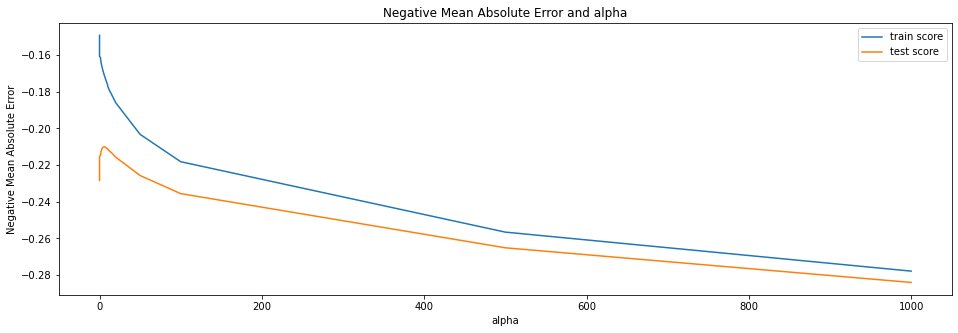

r2 of train 0.9378379406798446
r2 test  0.914664719097858
Adjusted r2 of test 0.7984242283554807
Adjusted r2 of train 0.9174410149654186
The MSE of the model on the train dataset for optimum alpha is 0.062162059320155366
The MSE of the model on the test dataset for optimum alpha is 0.08533528090214204


In [576]:
final_ridge=ModelLassoandRidge(15,True,X_train,y_train,X_test,y_test)

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'alpha': 0.001}
-0.20933297005657364


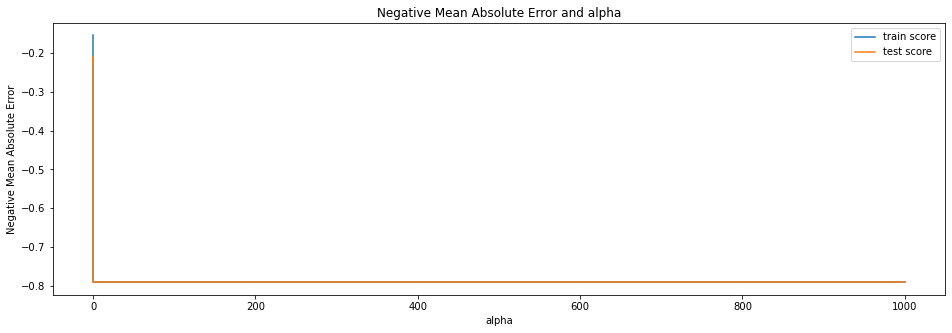

r2 of train 0.9328993288182069
r2 test  0.9154027790933243
Adjusted r2 of test 0.800167645750177
Adjusted r2 of train 0.9108819210866811
The MSE of the model on the train dataset for optimum alpha is 0.06710067118179312
The MSE of the model on the test dataset for optimum alpha is 0.08459722090667571


In [577]:
final_lasso=ModelLassoandRidge(15,False,X_train,y_train,X_test,y_test)

##### WE CAN SEE LASSO TEST R2 IS HIGHER THAN RIDGE AND R2 SCORE OF TRAIN AND TEST DIFFERENCE FOR LASSO IS GOOD
###### FINAL MODEL 
###### RIDGE :
- ALPHA =6 


###### LASSSO: 
- ALPHA=0.001

In [549]:
betas = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)

In [550]:
betas['Ridge'] = final_ridge.coef_
betas['Lasso'] = final_lasso.coef_

In [551]:
betas.sort_values(by=['Lasso'],ascending=False)

,Ridge,Lasso
GrLivArea,0.311575,0.359464
OverallQual_Excellent,0.265588,0.337086
Functional_Typ,0.259892,0.299671
Neighborhood_Crawfor,0.248996,0.286721
OverallCond_Excellent,0.217277,0.251027
Neighborhood_StoneBr,0.226731,0.249646
Exterior1st_BrkFace,0.193461,0.236472
OverallQual_Very_Good,0.221034,0.234442
SaleCondition_Alloca,0.191020,0.193150
RoofMatl_WdShngl,0.177895,0.183107


Top positive influencers 


In [552]:
betas.sort_values(by=['Lasso'],ascending=False).head(10)

,Ridge,Lasso
GrLivArea,0.311575,0.359464
OverallQual_Excellent,0.265588,0.337086
Functional_Typ,0.259892,0.299671
Neighborhood_Crawfor,0.248996,0.286721
OverallCond_Excellent,0.217277,0.251027
Neighborhood_StoneBr,0.226731,0.249646
Exterior1st_BrkFace,0.193461,0.236472
OverallQual_Very_Good,0.221034,0.234442
SaleCondition_Alloca,0.191020,0.193150
RoofMatl_WdShngl,0.177895,0.183107


#### SUBJECTIVE QUESTIONS 
- Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Answer

Currently the best alpha for Ridge is 6.0 and Lasso is 0.001


Let us try to double and check the effect on model 

In [553]:
def ModelLassoandRidgeChanged(folds,estimator_param,X_train,y_train,X_test,y_test,alpha_question):

    if estimator_param:
        model = Ridge(alpha=alpha_question)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print(r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print(r2_test_lr)
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    else:
        model = Lasso(alpha=alpha_question)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        r2_train_lr = r2_score(y_train, y_pred_train)
        print(r2_train_lr)
        r2_test_lr = r2_score(y_test, y_pred_test)
        print(r2_test_lr)
        print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_pred_test))
    return model

In [554]:
new_ridge=ModelLassoandRidgeChanged(15,True,X_train,y_train,X_test,y_test,12.0)

0.9327314998726124
0.9160001686640548
The MSE of the model on the test dataset for optimum alpha is 0.08399983133594523


We can see improvment in R2 test score and reduction of MSE in ridge 

In [555]:
new_lasso=ModelLassoandRidgeChanged(15,False,X_train,y_train,X_test,y_test,0.002)

0.92412681053262
0.9146610105670694
The MSE of the model on the test dataset for optimum alpha is 0.0853389894329306


We can see the MSE has gone up but very less variation can be seen.But yes increase of MSE indicates model can be better

We can see in both Ridge and Lasso the R2 scores on train reduced with double of alpha

In [556]:
betas = pd.DataFrame(index=X_train.columns)
pd.set_option('display.max_rows', None)

In [559]:
betas['Ridge_12'] = new_ridge.coef_
betas['Lasso_0.002'] = new_lasso.coef_
betas['Ridge'] = final_ridge.coef_
betas['Lasso'] = final_lasso.coef_

In [560]:
betas.sort_values(by=['Lasso'],ascending=False).head(10)

,Ridge,Lasso,Ridge_12,Lasso_0.002
GrLivArea,0.311575,0.359464,0.276946,0.363908
OverallQual_Excellent,0.265588,0.337086,0.232694,0.366540
Functional_Typ,0.259892,0.299671,0.235331,0.262494
Neighborhood_Crawfor,0.248996,0.286721,0.219314,0.256675
OverallCond_Excellent,0.217277,0.251027,0.173502,0.192925
Neighborhood_StoneBr,0.226731,0.249646,0.184651,0.198187
Exterior1st_BrkFace,0.193461,0.236472,0.171830,0.217248
OverallQual_Very_Good,0.221034,0.234442,0.204171,0.239217
SaleCondition_Alloca,0.191020,0.193150,0.120085,0.000000
RoofMatl_WdShngl,0.177895,0.183107,0.111270,0.000000


We can clearly see that feature 'SaleCondition_Alloca' and 'RoofMatl_WdShngl' is penalised and coeffiecent is very very less .And lasso has removed both of them 

- Question 2

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

- Answer

#### RIDGE METRICS
- r2 of train 0.9378379406798446
- r2 test  0.914664719097858
- Adjusted r2 of test 0.7984242283554807
- Adjusted r2 of train 0.9174410149654186
- The MSE of the model on the train dataset for optimum alpha is 0.062162059320155366
- The MSE of the model on the test dataset for optimum alpha is 0.08533528090214204

#### LASSO METRICS
- r2 of train 0.9328993288182069
- r2 test  0.9154027790933243
- Adjusted r2 of test 0.800167645750177
- Adjusted r2 of train 0.9108819210866811
- The MSE of the model on the train dataset for optimum alpha is 0.06710067118179312
- The MSE of the model on the test dataset for optimum alpha is 0.08459722090667571

##### Lasso is better model 
###### Reason
- r2 score of train and test of Lasso is 1.74 but ridge is 2.32.Hence the difference between the r2 score of train and test should be less
- r2 score for test of Lasso is better than ridge. In regression we consider r2 score test to be better 
- MSE on test data for lasso is lower than MSE  on test data for ridge.Lower MSE indicates lower error in prediction 